In [10]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
from utils import data_manage_utils

In [11]:
data = pd.read_pickle("./processed_files/01a_preprocessing.pkl")
data

,OP_UNIQUE_CARRIER,ORIGIN,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5612585,F9,LAS,230,2811.51698,0,-0.781831,0.62349,0.932008,0.362438,0,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-10
5614966,DL,SFO,268,3442.37826,2,-0.781831,0.62349,0.979045,0.203642,-3,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
5616651,DL,SAN,241,3044.87128,2,-0.781831,0.62349,0.999990,-0.004363,-6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-20
5616326,DL,SFO,270,3442.37826,2,-0.781831,0.62349,0.999762,-0.021815,-5,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5613460,UA,SFO,278,3442.37826,2,-0.781831,0.62349,0.996195,-0.087156,6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,122,928.58918,8,-0.781831,0.62349,-0.100188,0.994969,-5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-10
11284363,WN,MDW,110,951.11994,8,-0.781831,0.62349,-0.065403,0.997859,20,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5
11283412,WN,DEN,170,1929.59866,8,-0.781831,0.62349,-0.065403,0.997859,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,17
11286614,B6,BOS,179,1522.43564,11,-0.781831,0.62349,-0.047978,0.998848,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,30


[-105, -75, -45, -15, 15, 45, 75, 105, 135]


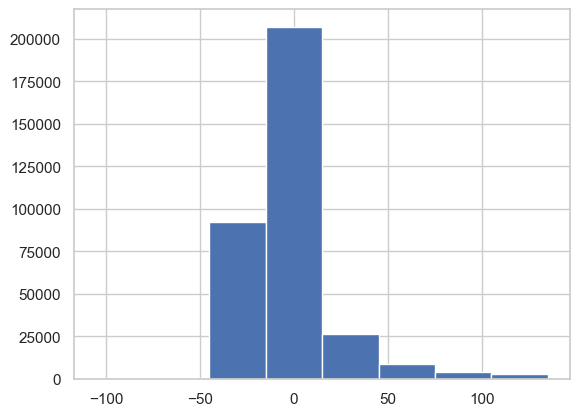

In [12]:
y = data[data.columns[-1:]].to_numpy()
X = data[data.columns[:-1]].to_numpy()
bins_pos = []

for bin_step in range(-105, 150, 30):
    bins_pos.append(bin_step)

print(bins_pos)
plt.hist(y, bins=bins_pos)
plt.show()

[]

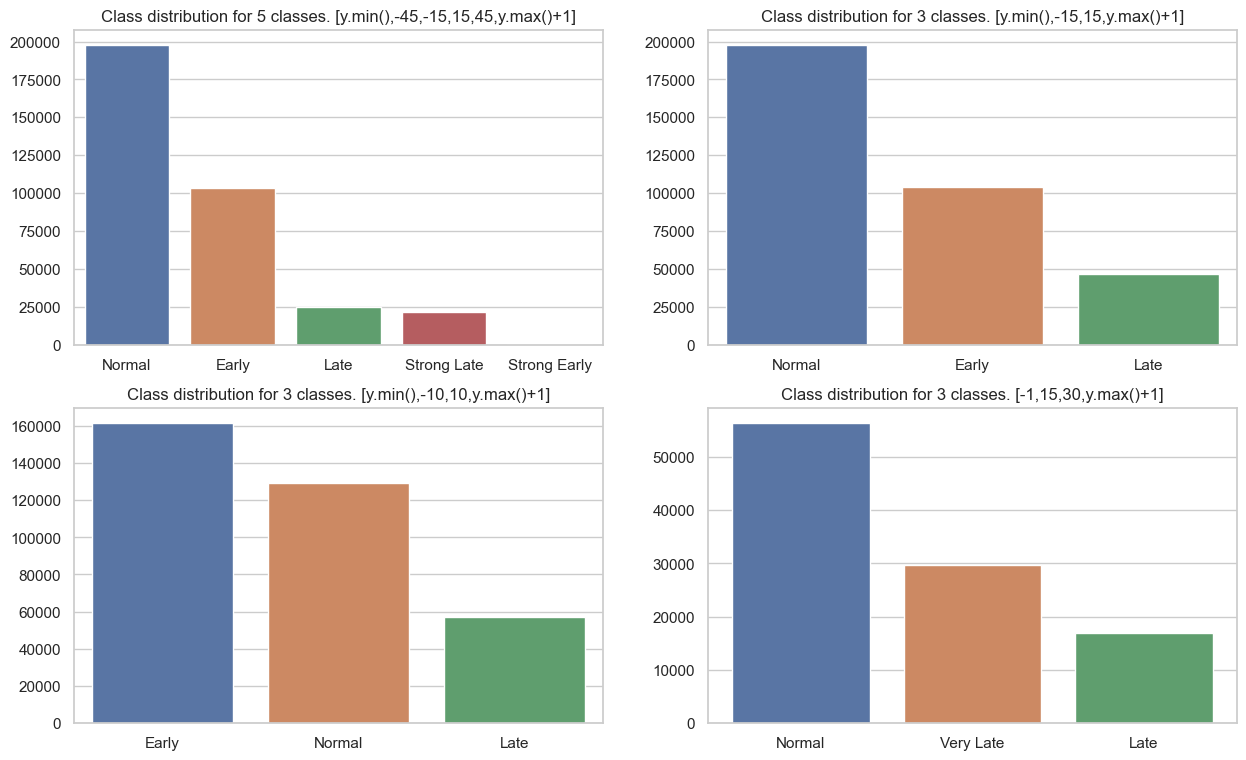

In [13]:
fig, axes = plt.subplots(2,2,figsize=(15,9))

bins1 = [y.min(),-45,-15,15,45,y.max()+1]
labels1 = ["Strong Early","Early","Normal","Late","Strong Late"]
bins2 = [y.min(),-15,15,y.max()+1]
labels2 = ["Early","Normal","Late"]
bins3 = [y.min(),-10,10,y.max()+1]
labels3 = ["Early","Normal","Late"]
bins4 = [-1,15,30,y.max()+1]
labels4 = ["Normal","Late","Very Late"]

axes[0][0].set_title("Class distribution for 5 classes. [y.min(),-45,-15,15,45,y.max()+1]")
axes[0][1].set_title("Class distribution for 3 classes. [y.min(),-15,15,y.max()+1]")
axes[1][0].set_title("Class distribution for 3 classes. [y.min(),-10,10,y.max()+1]")
axes[1][1].set_title("Class distribution for 3 classes. [-1,15,30,y.max()+1]")

data4 = data.where(data["ARR_DELAY_MINS"] >= 0).dropna()

cats1 = pd.cut(data.ARR_DELAY_MINS, bins1, labels = labels1,include_lowest = True)
cats2 = pd.cut(data.ARR_DELAY_MINS, bins2, labels = labels2,include_lowest = True)
cats3 = pd.cut(data.ARR_DELAY_MINS, bins3, labels = labels3,include_lowest = True)
cats4 = pd.cut(data4.ARR_DELAY_MINS, bins4, labels = labels4,include_lowest = True)

sns.barplot(x=list(cats1.value_counts().index), y= list(cats1.value_counts()), ax=axes[0][0])
sns.barplot(x=list(cats2.value_counts().index), y= list(cats2.value_counts()), ax=axes[0][1])
sns.barplot(x=list(cats3.value_counts().index), y= list(cats3.value_counts()), ax=axes[1][0])
sns.barplot(x=list(cats4.value_counts().index), y= list(cats4.value_counts()), ax=axes[1][1])

plt.plot()

In [14]:
SET_TO_USE = 1

if SET_TO_USE == 1:
    y_dict = {
        "Early" : 0,
        "Normal" : 1,
        "Late" : 2
    }
    data["ARR_DELAY_CATS"] = list(cats2.values)
    data = data.drop(["ARR_DELAY_MINS"], axis="columns")
    data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))
elif SET_TO_USE == 2:
    y_dict = {
        "Early" : 0,
        "Normal" : 1,
        "Late" : 2
    }
    data["ARR_DELAY_CATS"] = list(cats3.values)
    data = data.drop(["ARR_DELAY_MINS"], axis="columns")
    data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))
elif SET_TO_USE == 3:
    y_dict = {
        "Normal" : 0,
        "Late" : 1,
        "Very Late" : 1
    }
    data4["ARR_DELAY_CATS"] = list(cats4.values)
    data = data4.drop(["ARR_DELAY_MINS"], axis="columns")
    data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))


data

,OP_UNIQUE_CARRIER,ORIGIN,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_CATS
5612585,F9,LAS,230,2811.51698,0,-0.781831,0.62349,0.932008,0.362438,0,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5614966,DL,SFO,268,3442.37826,2,-0.781831,0.62349,0.979045,0.203642,-3,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5616651,DL,SAN,241,3044.87128,2,-0.781831,0.62349,0.999990,-0.004363,-6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,0
5616326,DL,SFO,270,3442.37826,2,-0.781831,0.62349,0.999762,-0.021815,-5,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5613460,UA,SFO,278,3442.37826,2,-0.781831,0.62349,0.996195,-0.087156,6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,122,928.58918,8,-0.781831,0.62349,-0.100188,0.994969,-5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11284363,WN,MDW,110,951.11994,8,-0.781831,0.62349,-0.065403,0.997859,20,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11283412,WN,DEN,170,1929.59866,8,-0.781831,0.62349,-0.065403,0.997859,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
11286614,B6,BOS,179,1522.43564,11,-0.781831,0.62349,-0.047978,0.998848,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2


In [15]:
data = data.drop(["OP_UNIQUE_CARRIER","ORIGIN"],axis=1)
data

,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),NR_ENGINES,APPROACH_SPEED(KMH),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_CATS
5612585,230,2811.51698,0,-0.781831,0.62349,0.932008,0.362438,0,2.0,251.872,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5614966,268,3442.37826,2,-0.781831,0.62349,0.979045,0.203642,-3,2.0,261.132,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5616651,241,3044.87128,2,-0.781831,0.62349,0.999990,-0.004363,-6,2.0,261.132,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,0
5616326,270,3442.37826,2,-0.781831,0.62349,0.999762,-0.021815,-5,2.0,264.836,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5613460,278,3442.37826,2,-0.781831,0.62349,0.996195,-0.087156,6,2.0,261.132,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,122,928.58918,8,-0.781831,0.62349,-0.100188,0.994969,-5,2.0,251.872,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11284363,110,951.11994,8,-0.781831,0.62349,-0.065403,0.997859,20,2.0,261.132,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11283412,170,1929.59866,8,-0.781831,0.62349,-0.065403,0.997859,43,2.0,261.132,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
11286614,179,1522.43564,11,-0.781831,0.62349,-0.047978,0.998848,43,2.0,251.872,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2


In [16]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]
#Test-Train-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
X_train

Shape of X_train: (278508, 40)
Shape of y_train: (278508, 1)
Shape of X_test: (69628, 40)
Shape of y_test: (69628, 1)


,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),NR_ENGINES,APPROACH_SPEED(KMH),...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
11166495,210,2479.99294,46,-0.974928,-0.222521,0.130526,-0.991445,-7,3.0,255.576,...,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
9397971,185,2042.25246,65,0.781831,0.623490,-0.559193,0.829038,-8,2.0,261.132,...,0,0,0,0,0,3.0,0.0,0.0,3.0,3.0
7167635,60,170.59004,57,0.433884,-0.900969,-0.994056,0.108867,-2,2.0,259.280,...,0,0,0,0,0,0.0,2.0,2.0,3.0,3.0
8083921,151,1459.67138,64,-0.781831,0.623490,-0.492424,-0.870356,84,3.0,255.576,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7642980,94,695.23488,65,-0.781831,0.623490,-0.928810,-0.370557,-5,3.0,255.576,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076487,82,683.96950,55,0.433884,-0.900969,0.021815,-0.999762,-6,2.0,264.836,...,0,0,0,0,0,0.0,3.0,2.0,3.0,3.0
11181815,122,928.58918,9,-0.781831,0.623490,-0.100188,0.994969,14,2.0,251.872,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
5787756,93,492.45804,63,0.433884,-0.900969,0.824126,-0.566406,-2,2.0,257.428,...,0,0,0,0,0,3.0,0.0,0.0,0.0,3.0
10720983,100,719.37498,49,-0.433884,-0.900969,-0.939693,0.342020,-6,2.0,261.132,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0


In [17]:
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

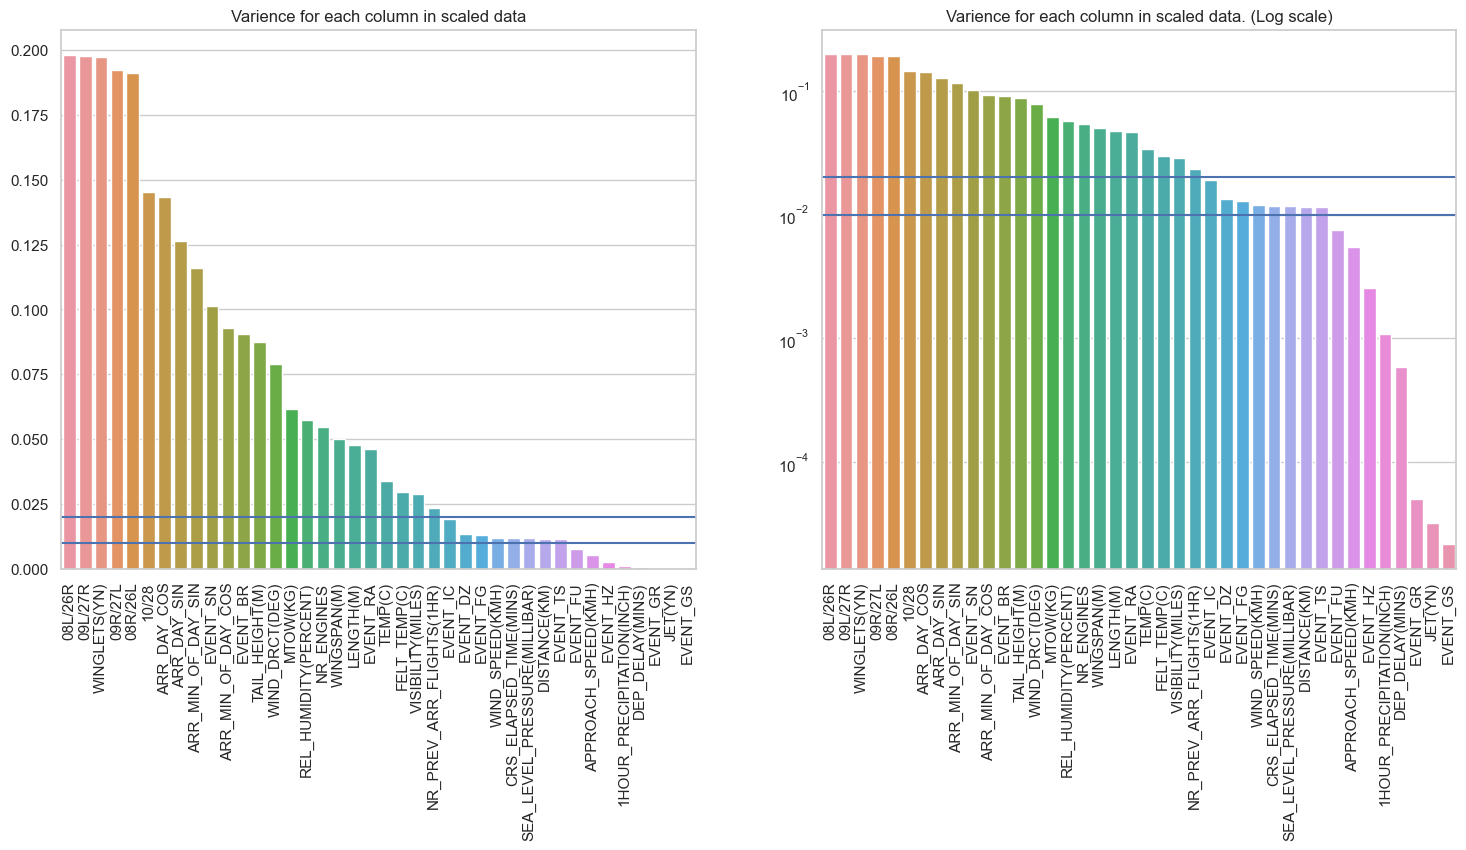

In [18]:
fig, axes = plt.subplots(1,2,figsize=(18,7))
var = pd.DataFrame(X_train_minmax, columns=X_train.columns).var().sort_values(ascending=False)
sns.set(style="whitegrid")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[0].set_title("Varience for each column in scaled data")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[1].set_yscale("log")
axes[1].set_title("Varience for each column in scaled data. (Log scale)")
axes[0].axhline(0.01)
axes[1].axhline(0.01)
axes[0].axhline(0.02)
axes[1].axhline(0.02)

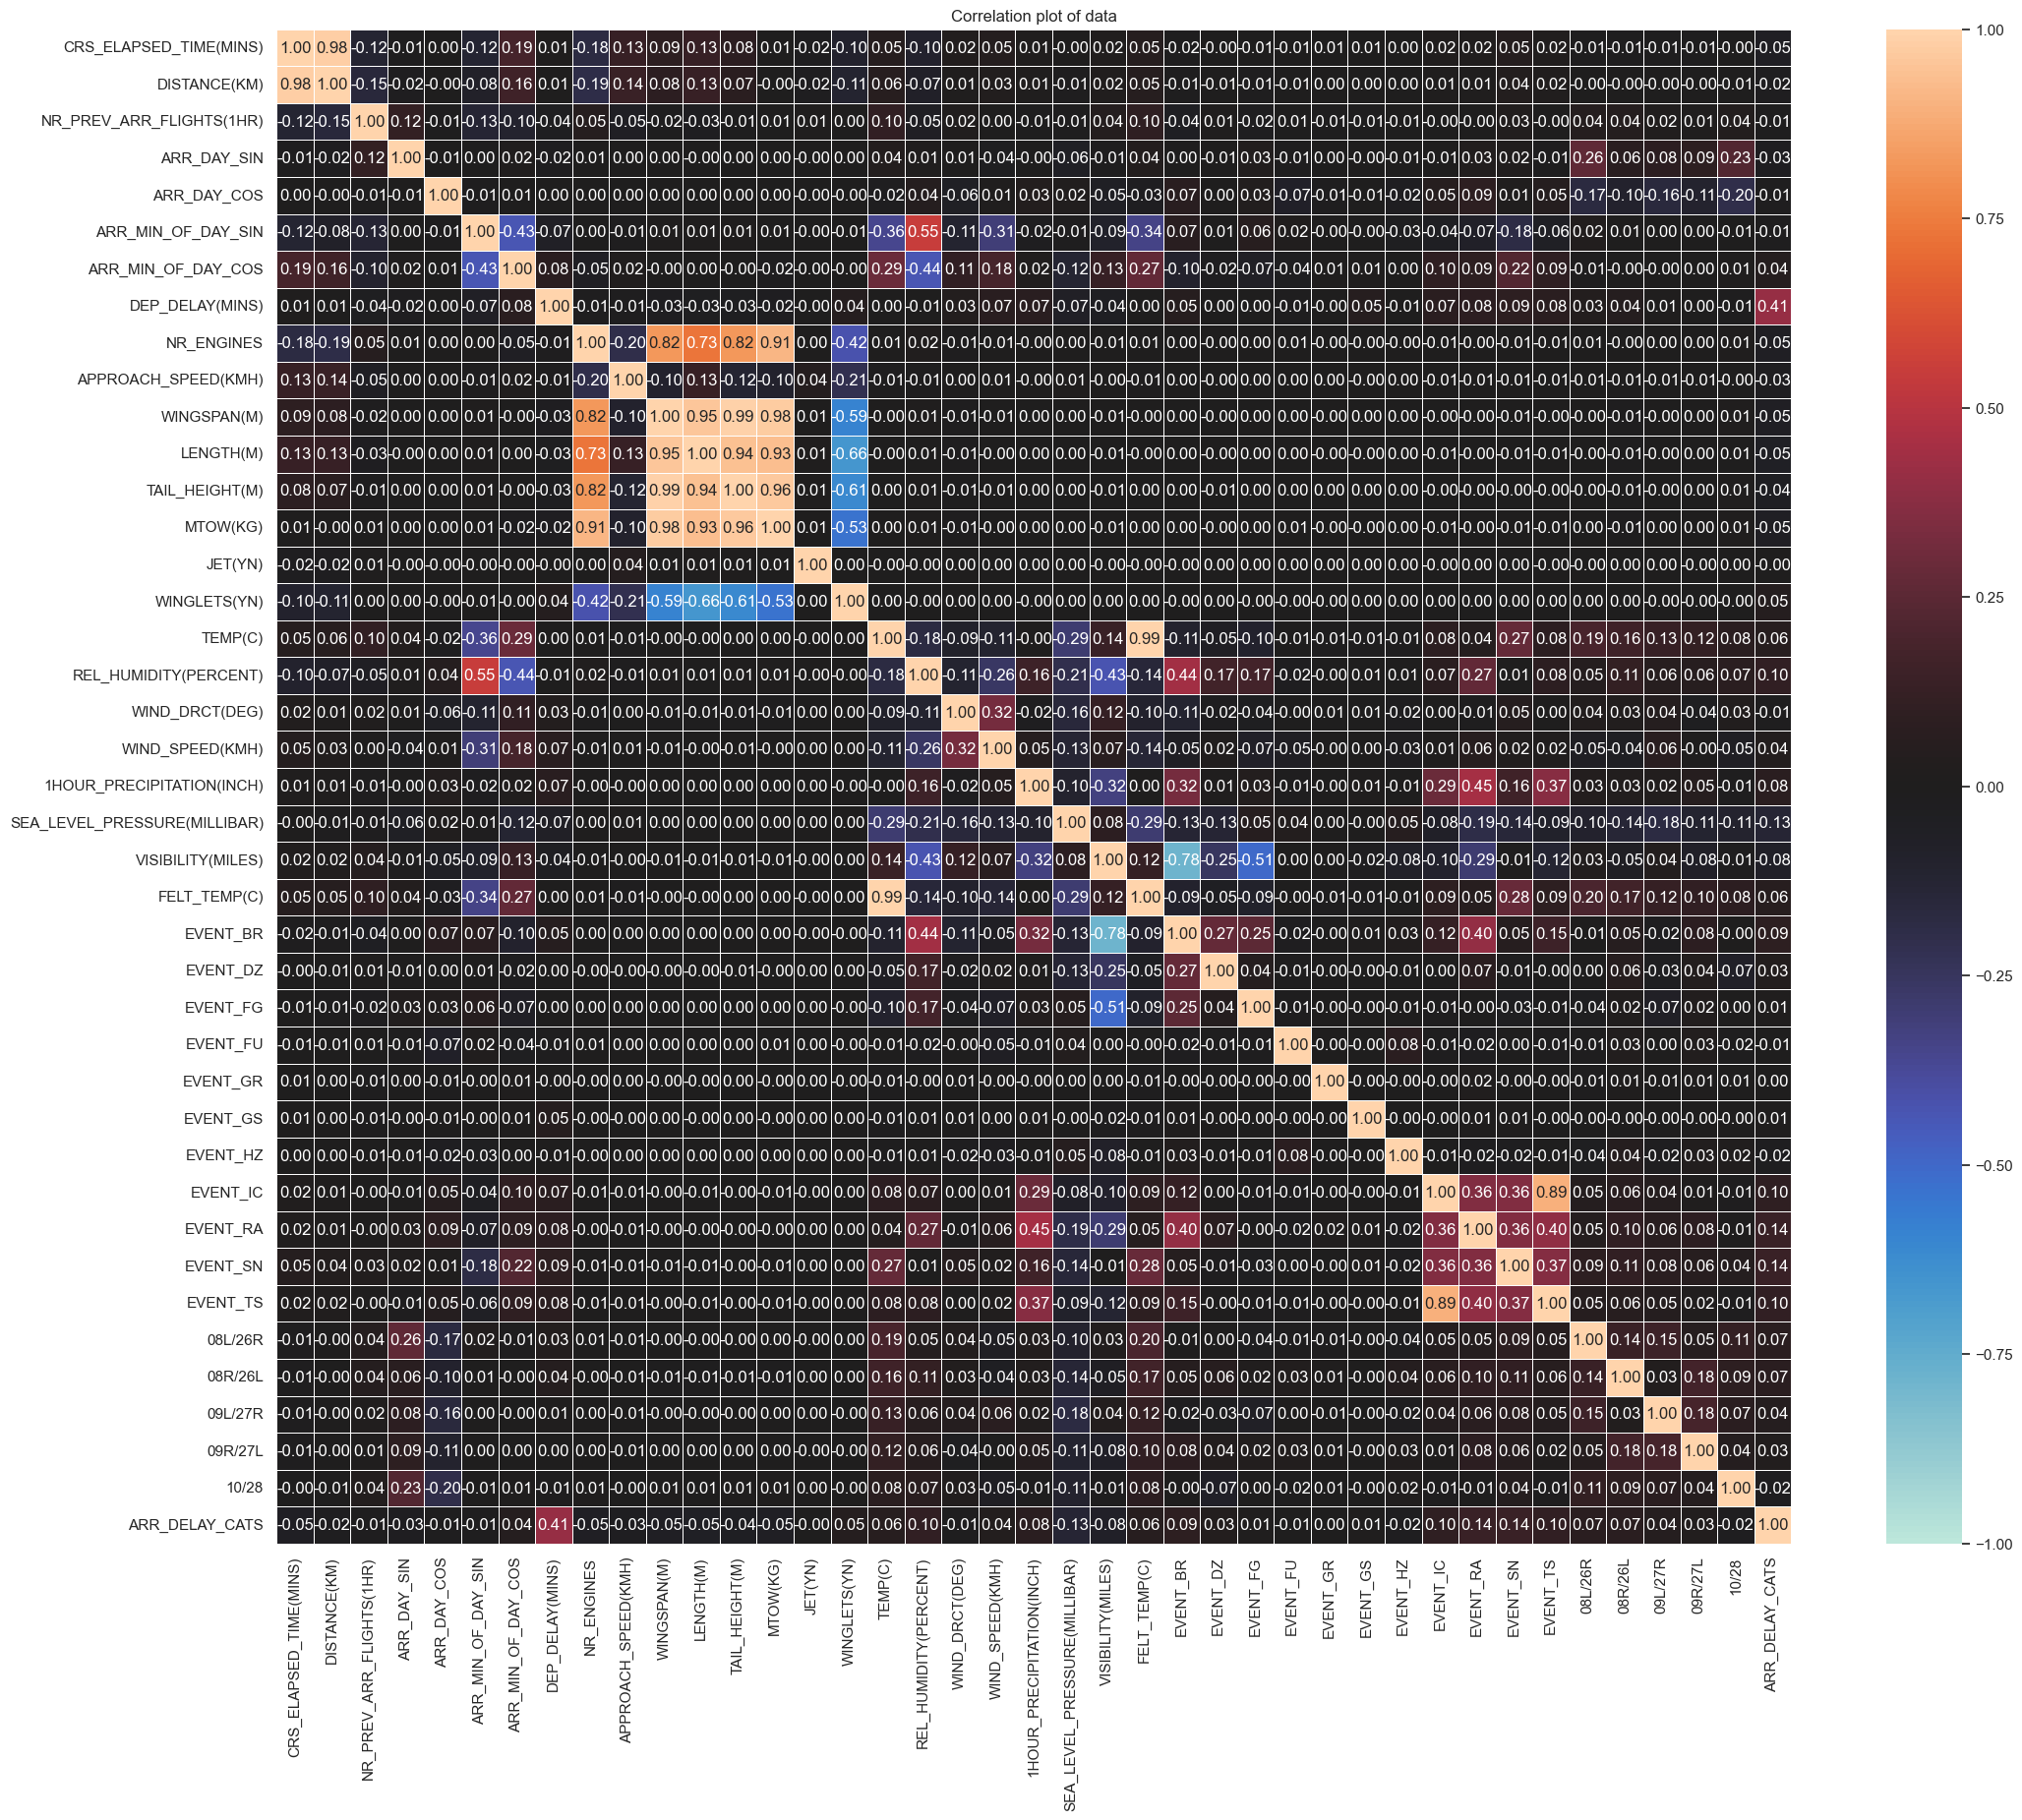

In [19]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
g = sns.heatmap(pd.DataFrame(np.hstack((X_train_minmax,y_train)), columns=list(X_train.columns) + list(y_train.columns)).corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".2f")

In [20]:
low_var_labels = list(var[var < 0.01].index)
low_var_labels = [s for s in low_var_labels if s != "DEP_DELAY(MINS)"]
high_corr_labels = ["DISTANCE(KM)","NR_ENGINES","WINGSPAN(M)","LENGTH(M)","TAIL_HEIGHT(M)","FELT_TEMP(C)"]
labels_to_drop = low_var_labels + high_corr_labels
labels_to_drop

['EVENT_FU',
 'APPROACH_SPEED(KMH)',
 'EVENT_HZ',
 '1HOUR_PRECIPITATION(INCH)',
 'EVENT_GR',
 'JET(YN)',
 'EVENT_GS',
 'DISTANCE(KM)',
 'NR_ENGINES',
 'WINGSPAN(M)',
 'LENGTH(M)',
 'TAIL_HEIGHT(M)',
 'FELT_TEMP(C)']

In [21]:
X_train = X_train.drop(columns=labels_to_drop, axis="columns")
X_test = X_test.drop(columns=labels_to_drop, axis="columns")
X_train

,CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_FG,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
11166495,210,46,-0.974928,-0.222521,0.130526,-0.991445,-7,206384.360000,0,17.222222,...,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
9397971,185,65,0.781831,0.623490,-0.559193,0.829038,-8,79015.726400,0,26.722222,...,0,0,0,0,0,3.0,0.0,0.0,3.0,3.0
7167635,60,57,0.433884,-0.900969,-0.994056,0.108867,-2,21522.940400,1,27.222222,...,0,0,0,0,0,0.0,2.0,2.0,3.0,3.0
8083921,151,64,-0.781831,0.623490,-0.492424,-0.870356,84,206384.360000,0,25.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7642980,94,65,-0.781831,0.623490,-0.928810,-0.370557,-5,206384.360000,0,25.000000,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076487,82,55,0.433884,-0.900969,0.021815,-0.999762,-6,122469.840000,0,20.611111,...,0,0,0,0,0,0.0,3.0,2.0,3.0,3.0
11181815,122,9,-0.781831,0.623490,-0.100188,0.994969,14,78000.133912,1,8.277778,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
5787756,93,63,0.433884,-0.900969,0.824126,-0.566406,-2,53523.856000,0,11.722222,...,0,0,0,0,0,3.0,0.0,0.0,0.0,3.0
10720983,100,49,-0.433884,-0.900969,-0.939693,0.342020,-6,79015.726400,0,17.222222,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0


In [22]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled

array([[ 1.63550903, -0.72415414, -1.46152995, ..., -0.29602074,
        -0.27947658, -0.97825078],
       [ 1.16092512,  0.3129493 ,  1.07214336, ..., -1.04532903,
         1.24145008,  0.7711042 ],
       [-1.21199441, -0.12372584,  0.57031829, ...,  0.45328756,
         1.24145008,  0.7711042 ],
       ...,
       [-0.58554365,  0.20378051,  0.57031829, ..., -1.04532903,
        -1.03993991,  0.7711042 ],
       [-0.45266016, -0.56040097, -0.68121297, ..., -1.04532903,
        -1.03993991,  0.7711042 ],
       [ 0.05989046,  0.64045565,  1.35063527, ...,  1.20259585,
         0.48098675,  0.7711042 ]])

In [23]:
def print_shape_and_cols(df):
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns}")

In [24]:
print_shape_and_cols(X_train)
X_train

Shape: (278508, 27)
Columns: Index(['CRS_ELAPSED_TIME(MINS)', 'NR_PREV_ARR_FLIGHTS(1HR)', 'ARR_DAY_SIN',
       'ARR_DAY_COS', 'ARR_MIN_OF_DAY_SIN', 'ARR_MIN_OF_DAY_COS',
       'DEP_DELAY(MINS)', 'MTOW(KG)', 'WINGLETS(YN)', 'TEMP(C)',
       'REL_HUMIDITY(PERCENT)', 'WIND_DRCT(DEG)', 'WIND_SPEED(KMH)',
       'SEA_LEVEL_PRESSURE(MILLIBAR)', 'VISIBILITY(MILES)', 'EVENT_BR',
       'EVENT_DZ', 'EVENT_FG', 'EVENT_IC', 'EVENT_RA', 'EVENT_SN', 'EVENT_TS',
       '08L/26R', '08R/26L', '09L/27R', '09R/27L', '10/28'],
      dtype='object')


,CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_FG,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
11166495,210,46,-0.974928,-0.222521,0.130526,-0.991445,-7,206384.360000,0,17.222222,...,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
9397971,185,65,0.781831,0.623490,-0.559193,0.829038,-8,79015.726400,0,26.722222,...,0,0,0,0,0,3.0,0.0,0.0,3.0,3.0
7167635,60,57,0.433884,-0.900969,-0.994056,0.108867,-2,21522.940400,1,27.222222,...,0,0,0,0,0,0.0,2.0,2.0,3.0,3.0
8083921,151,64,-0.781831,0.623490,-0.492424,-0.870356,84,206384.360000,0,25.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7642980,94,65,-0.781831,0.623490,-0.928810,-0.370557,-5,206384.360000,0,25.000000,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076487,82,55,0.433884,-0.900969,0.021815,-0.999762,-6,122469.840000,0,20.611111,...,0,0,0,0,0,0.0,3.0,2.0,3.0,3.0
11181815,122,9,-0.781831,0.623490,-0.100188,0.994969,14,78000.133912,1,8.277778,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
5787756,93,63,0.433884,-0.900969,0.824126,-0.566406,-2,53523.856000,0,11.722222,...,0,0,0,0,0,3.0,0.0,0.0,0.0,3.0
10720983,100,49,-0.433884,-0.900969,-0.939693,0.342020,-6,79015.726400,0,17.222222,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0


In [25]:
print_shape_and_cols(y_train)
y_train

Shape: (278508, 1)
Columns: Index(['ARR_DELAY_CATS'], dtype='object')


,ARR_DELAY_CATS
11166495,0
9397971,0
7167635,1
8083921,2
7642980,1
...,...
10076487,1
11181815,1
5787756,1
10720983,0


In [26]:
print_shape_and_cols(X_test)
X_test

Shape: (69628, 27)
Columns: Index(['CRS_ELAPSED_TIME(MINS)', 'NR_PREV_ARR_FLIGHTS(1HR)', 'ARR_DAY_SIN',
       'ARR_DAY_COS', 'ARR_MIN_OF_DAY_SIN', 'ARR_MIN_OF_DAY_COS',
       'DEP_DELAY(MINS)', 'MTOW(KG)', 'WINGLETS(YN)', 'TEMP(C)',
       'REL_HUMIDITY(PERCENT)', 'WIND_DRCT(DEG)', 'WIND_SPEED(KMH)',
       'SEA_LEVEL_PRESSURE(MILLIBAR)', 'VISIBILITY(MILES)', 'EVENT_BR',
       'EVENT_DZ', 'EVENT_FG', 'EVENT_IC', 'EVENT_RA', 'EVENT_SN', 'EVENT_TS',
       '08L/26R', '08R/26L', '09L/27R', '09R/27L', '10/28'],
      dtype='object')


,CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_FG,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
6061862,124,40,0.781831,0.623490,0.177944,-0.984041,-1,206384.360000,0,7.222222,...,0,0,0,0,0,3.0,0.0,0.0,0.0,3.0
6567004,112,80,0.000000,1.000000,0.716302,-0.697790,-3,206384.360000,0,13.888889,...,0,0,1,0,0,0.0,3.0,2.0,3.0,3.0
5668759,61,57,0.974928,-0.222521,-0.573576,-0.819152,-7,21522.940400,1,10.611111,...,0,0,0,0,0,0.0,3.0,0.0,0.0,3.0
7953069,171,65,-0.433884,-0.900969,-0.975342,0.220697,0,93499.826144,1,29.388889,...,0,0,0,0,0,0.0,3.0,0.0,3.0,3.0
11204574,125,55,0.781831,0.623490,-0.500000,0.866025,-5,79015.726400,0,7.222222,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10662784,95,48,-0.781831,0.623490,-0.779884,-0.625923,-3,122469.840000,0,9.388889,...,0,0,0,0,0,1.0,1.0,1.0,1.0,2.0
7487982,208,3,-0.433884,-0.900969,0.999962,0.008727,6,93499.826144,1,12.222222,...,0,0,0,0,0,1.0,3.0,1.0,2.0,1.0
6871465,110,79,-0.781831,0.623490,-0.953717,0.300706,9,79015.726400,0,25.000000,...,0,0,0,0,0,1.0,1.0,3.0,3.0,1.0
9317074,119,66,0.433884,-0.900969,-0.970296,-0.241922,-6,79015.726400,0,29.388889,...,0,0,0,0,0,2.0,0.0,3.0,3.0,2.0


In [27]:
print_shape_and_cols(y_test)
y_test

Shape: (69628, 1)
Columns: Index(['ARR_DELAY_CATS'], dtype='object')


,ARR_DELAY_CATS
6061862,1
6567004,0
5668759,0
7953069,0
11204574,0
...,...
10662784,0
7487982,1
6871465,1
9317074,0


In [63]:
import os

time, time_string = data_manage_utils.print_time(time_format="%Y_%m_%d-%H%M")
filepath = "./processed_files/B/"

if not os.path.exists(filepath):
    os.makedirs(filepath)

pd.to_pickle(X_train, filepath + "X_train_df.pkl")
pd.to_pickle(X_test, filepath + "X_test_df.pkl")
pd.to_pickle(y_train, filepath + "y_train_df.pkl")
pd.to_pickle(y_test, filepath + "y_test_df.pkl")
data_manage_utils.save_numpy_to_pickle(X_train_scaled, filepath + "X_train_scaled.pkl")
data_manage_utils.save_numpy_to_pickle(y_train.to_numpy(), filepath + "y_train.pkl")
data_manage_utils.save_numpy_to_pickle(X_test_scaled, filepath + "X_test_scaled.pkl")
data_manage_utils.save_numpy_to_pickle(y_test.to_numpy(), filepath + "y_test.pkl")
joblib.dump(std_scaler, filepath + "scaler.sav")

['./processed_files/B/scaler.sav']